In [1]:
import pandas as pd
import numpy as np
import jieba

In [2]:
df_news = pd.read_table('train.txt',names=['category','theme','URL','content'],encoding='utf-8')
df_news = df_news.dropna()
df_news.head()

,category,theme,URL,content
0,汽车,现代飞思现金直降８０００元 现车颜色齐全,http://autos.cn.yahoo.com/ypen/20120610/110144...,近日，编辑从进口现代合肥地区某经销商处了解到，即日起至６月３０日到该店购买现代飞思现金直降８...
1,汽车,丰田皇冠对问题车型实行“暗召回”,http://autos.cn.yahoo.com/ypen/20120615/111456...,虽然说代表王权的皇冠（车型 配置 图片 报价）并非谁都可以拥有，但皇冠汽车，只要有足够的钞票...
2,汽车,价格战爆发 京城豪华车日子也不好过,http://autos.cn.yahoo.com/ypen/20120612/110681...,“今年上半年的日子不好过呀！”的确，今年上半年，京城车市并非只是一些自主品牌的日子难熬，之前...
3,汽车,成都车展一神秘女子买走４００万绝版宾利车,http://autos.cn.yahoo.com/newspic/autos2/5363/...,在宾利展厅，下午４点以前，一款车一直没有揭开真面目，覆盖在车身上的天鹅绒幕布更让人感受到这款...
4,汽车,通用和欧宝工会拟１１月之前达成重组协议,http://autos.cn.yahoo.com/ypen/20120615/111428...,据外媒消息，通用汽车公司与德国金属工业工会拟在１１月份之前就欧宝重组的问题达成明确协议。５鹿...


In [3]:
df_news.shape

(50000, 4)

###  Tokenization：Use jieba tokenizer ###

In [4]:
content = df_news.content.values.tolist()
print (content[2000])

继北京、上海、贵阳之后，广州成为全国第四个推出汽车限购令的城市。从昨天起，广州开始实施“中小客车总量调控交通政策”，试行一年。０凑展阒菔姓府的规定，试行期内，全市中小客车增量配额为１２万辆，按照每月１万辆进行配置，这个时期，机关、企业事业单位、社会团体及其他组织和个人购车时，必须取得配置指标后方可办理牌照登记。＃吩拢踩眨保暗悖主持人大民和中国汽车流通协会常务理事贾新光带来评论：汽车限购风可能席卷全国，车市增长堪忧。


In [5]:
content_S = []
for line in content:
    current_segment = jieba.lcut(line)
    if len(current_segment) > 1 and current_segment != '\r\n': #换行符
        content_S.append(current_segment)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.626 seconds.
Prefix dict has been built successfully.


In [6]:
content_S[1000]

['Ｍ',
 'ｉ',
 'ｎ',
 'ｉ',
 '\u3000',
 'Ｍ',
 'Ｉ',
 'Ｎ',
 'Ｉ',
 '\u3000',
 'Ｃ',
 'ｏ',
 'ｏ',
 'ｐ',
 'ｅ',
 'ｒ',
 '\u3000',
 'Ｃ',
 'ａ',
 'ｂ',
 'ｒ',
 'ｉ',
 'ｏ']

In [7]:
df_content=pd.DataFrame({'content_S':content_S})
df_content.head()

,content_S
0,"[近日, ，, 编辑, 从, 进口, 现代, 合肥, 地区, 某, 经销商, 处, 了解, ..."
1,"[虽然, 说, 代表, 王权, 的, 皇冠, （, 车型, , 配置, , 图片, ,..."
2,"[“, 今年, 上半年, 的, 日子, 不好过, 呀, ！, ”, 的确, ，, 今年, 上..."
3,"[在, 宾利, 展厅, ，, 下午, ４, 点, 以前, ，, 一款, 车, 一直, 没有,..."
4,"[据, 外媒, 消息, ，, 通用汽车公司, 与, 德国, 金属, 工业, 工会, 拟, 在..."


In [8]:
stopwords=pd.read_csv("stopwords.txt",index_col=False,sep="\t",quoting=3,names=['stopword'])
stopwords[:20]

,stopword
0,!
1,""""
2,#
3,$
4,%
5,&
6,'
7,(
8,)
9,*


In [9]:
def drop_stopwords(contents,stopwords):
    contents_clean = []
    all_words = []
    for line in contents:
        line_clean = []
        for word in line:
            if word in stopwords or word.isdigit() or not word.isalpha():
                continue
            line_clean.append(word)
            all_words.append(str(word))
        contents_clean.append(line_clean)
    return contents_clean,all_words

contents = df_content.content_S.values.tolist()    
stopwords = stopwords.stopword.values.tolist()
contents_clean,all_words = drop_stopwords(contents,stopwords)

In [10]:
df_content=pd.DataFrame({'contents_clean':contents_clean})
df_content.head()

,contents_clean
0,"[编辑, 进口, 合肥, 地区, 经销商, 处, 即日起, 日到, 该店, 购买, 飞思, ..."
1,"[代表, 王权, 皇冠, 车型, 配置, 图片, 报价, 拥有, 皇冠, 汽车, 足够, 钞..."
2,"[上半年, 日子, 不好过, 上半年, 京城, 车市, 自主, 品牌, 日子, 难熬, 羡慕..."
3,"[宾利, 展厅, 一款, 车, 揭开, 真面目, 覆盖, 车, 身上, 天鹅绒, 幕布, 更..."
4,"[外媒, 通用汽车公司, 德国, 金属, 工业, 工会, 拟, 月份, 欧宝, 重组, 达成..."


In [11]:
df_all_words=pd.DataFrame({'all_words':all_words})
df_all_words.head()

,all_words
0,编辑
1,进口
2,合肥
3,地区
4,经销商


In [12]:
words_count=df_all_words.groupby(by=['all_words'])['all_words'].agg('count')
words_count = words_count.to_frame()
words_count.columns=['count']
words_count = words_count.reset_index().sort_values(by=["count"],ascending=False)
words_count.head()

,all_words,count
38903,公司,17308
160445,时间,13665
110993,工作,12721
184857,比赛,11837
54614,北京,11482


In [13]:
words_count[:50]

,all_words,count
38903,公司,17308
160445,时间,13665
110993,工作,12721
184857,比赛,11837
54614,北京,11482
248716,美国,11399
50482,前,11376
292106,车型,11205
23546,企业,11051
131908,情况,10379


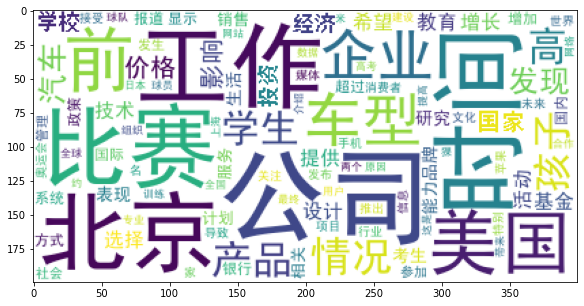

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

wordcloud=WordCloud(font_path="simhei.ttf",background_color="white",max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_count.head(100).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

###  TF-IDF ：Extract Key Words ###

In [15]:
import jieba.analyse
index = 2400
print (df_news['content'][index])
content_S_str = "".join(content_S[index])  
print ("  ".join(jieba.analyse.extract_tags(content_S_str, topK=5, withWeight=False)))

“整个广州骂声一片”，对于广州出台的汽车限购措施，一位广州的朋友说。Ｆ涫担在北京实行汽车限购措施之后，大家对广州等大城市实行汽车限购早已有心理准备。今年两会期间，广汽集团总经理曾庆洪就曾坦言：城市的汽车和道路、能源、环境等社会环境系统如果不能协调发展，不管是深圳还是广州，迟早都得限购。５是，广州的汽车限购仍然迎来了“骂声一片”。Ｔ因主要有两个，第一，大家对于广州是不是非限不可心存疑问。汽车行业对于北京的限购虽颇有微词，但北京“首堵”的形象已经深入人心，总有些“不限真不行”的同情。广州汽车保有量不及北京一半，每月销量也仅仅达到北京限购之后的数量。对这样的情况采取限购措施来治理拥堵，难免有方式方法过于简单粗暴的嫌疑。５诙，虽然广州的限购政策将基本参照北京的措施，但是广州限购带来的示范效应可能远远超过北京。北京的限购带来的示范效果，各城市多是有心模仿但总觉得心虚，毕竟那是拥有４００多万辆车的首都。广州限购之后，情况可能发生变化，毕竟与广州情况类似的城市更多一些。业界对于广州限购带来的后果非常担心。５比唬汽车行业对于广州限购的不满还有一个原因，那就是北京汽车限购政策是在车市快速增长时出台，而现在车市低迷，广州的限购颇有些落井下石的味道。Ｆ车社会来临，城市拥堵是一个国际难题。更快的发展公共交通，更好的城市和道路规划是全球通用的解决办法，我国也不能例外，不能简单地一限了之。消费者买不买车是纯粹的市场问题，应该交给市场去解决。（袁涛）
限购  广州  北京  汽车  城市


###  LDA 

Requirement：list of list format

In [16]:
from gensim import corpora, models, similarities
import gensim
#http://radimrehurek.com/gensim/

In [17]:
# mapping: get a bag of words
dictionary = corpora.Dictionary(contents_clean)
corpus = [dictionary.doc2bow(word) for word in contents_clean]

In [18]:
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=20) 

In [19]:
# No. 1 cluster 
print (lda.print_topic(1, topn=5))

0.010*"合作" + 0.009*"日本" + 0.009*"国际" + 0.007*"俄罗斯" + 0.007*"公司"


In [20]:
for topic in lda.print_topics(num_topics=20, num_words=5):
    print (topic[1])

0.051*"作品" + 0.023*"直升机" + 0.016*"战机" + 0.016*"乳房" + 0.015*"拍"
0.010*"合作" + 0.009*"日本" + 0.009*"国际" + 0.007*"俄罗斯" + 0.007*"公司"
0.020*"背部" + 0.018*"警方" + 0.013*"手臂" + 0.011*"法国" + 0.010*"乌克兰"
0.007*"孩子" + 0.007*"电影" + 0.005*"生活" + 0.005*"演员" + 0.004*"影片"
0.024*"设计" + 0.022*"载人" + 0.021*"航天" + 0.021*"来源" + 0.018*"一号"
0.009*"工作" + 0.008*"教育" + 0.006*"文化" + 0.006*"社会" + 0.006*"国家"
0.046*"婚姻" + 0.032*"恋情" + 0.031*"女友" + 0.025*"小姐" + 0.023*"越南"
0.041*"海军" + 0.023*"颍" + 0.023*"珠宝" + 0.012*"ｘ" + 0.011*"Ｙ"
0.010*"增长" + 0.008*"收入" + 0.007*"校园" + 0.007*"女孩子" + 0.007*"全国"
0.005*"网友" + 0.004*"工作" + 0.003*"微博" + 0.003*"老师" + 0.003*"武警"
0.034*"减肥" + 0.021*"教师" + 0.020*"影视" + 0.012*"兄弟" + 0.012*"克"
0.011*"时尚" + 0.008*"搭配" + 0.006*"设计" + 0.006*"效果" + 0.005*"完美"
0.040*"选手" + 0.021*"化妆" + 0.019*"礼物" + 0.017*"决赛" + 0.017*"军人"
0.024*"价格" + 0.012*"伊朗" + 0.008*"敷" + 0.007*"黄金" + 0.005*"美元"
0.026*"婚礼" + 0.020*"米" + 0.018*"南海" + 0.014*"小学" + 0.011*"博物馆"
0.020*"品牌" + 0.019*"单品" + 0.015*"比基尼" + 0.014*"奢侈品" + 0.0

In [21]:
df_train=pd.DataFrame({'contents_clean':contents_clean,'label':df_news['category']})
df_train[10:15]

,contents_clean,label
10,"[二环, 多处, 桥下, 积水, 车辆, 受阻, 官园, 桥, 阜成门, 桥, 西四, 七条...",汽车
11,"[彩蝶飞舞, 肯定, 车]",汽车
12,"[继, 上个月, 法兰克福, 车展, 本月, 开幕, 日本, 东京, 车展, 带来, 多款,...",汽车
13,"[青年报, 报道, 上周, 英菲尼迪, 国产化, 项目, 湖北, 襄阳, 签约, 第一个, ...",汽车
14,"[江语晨, 名下, 宝马, 座, 驾, 神秘, 更换, 两次, 车牌, 第一次, 台湾, 传...",汽车


In [22]:
df_train.label.unique()

array(['汽车', '财经', '科技', '健康', '体育', '教育', '文化', '军事', '娱乐', '时尚'],
      dtype=object)

In [23]:
label_mapping = {"汽车": 1, "财经": 2, "科技": 3, "健康": 4, "体育":5, "教育": 6,"文化": 7,"军事": 8,"娱乐": 9,"时尚": 0}
df_train['label'] = df_train['label'].map(label_mapping)
df_train.head()

,contents_clean,label
0,"[编辑, 进口, 合肥, 地区, 经销商, 处, 即日起, 日到, 该店, 购买, 飞思, ...",1
1,"[代表, 王权, 皇冠, 车型, 配置, 图片, 报价, 拥有, 皇冠, 汽车, 足够, 钞...",1
2,"[上半年, 日子, 不好过, 上半年, 京城, 车市, 自主, 品牌, 日子, 难熬, 羡慕...",1
3,"[宾利, 展厅, 一款, 车, 揭开, 真面目, 覆盖, 车, 身上, 天鹅绒, 幕布, 更...",1
4,"[外媒, 通用汽车公司, 德国, 金属, 工业, 工会, 拟, 月份, 欧宝, 重组, 达成...",1


In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_train['contents_clean'].values, df_train['label'].values, random_state=1)

In [25]:
x_train[0][1]

'高考'

In [26]:
words = []
for line_index in range(len(x_train)):
    try:
        words.append(' '.join(x_train[line_index]))
    except:
        print (line_index,word_index)
words[0]        

'导读 高考 结束 关注 全国 新课标 卷 高考作文 写 符合 作文 命题 笔者 第一 时间 访问 全国 高考 备考 指导 中心 主任 国家 创新 教育 课题组 成员 远程教育 网络 中心 主任 全国 学雷锋 树新风 宣讲团 副团长 张峰 教授 张峰 教授 长期 高考 命题 研究 教学 工作 连续 三年 考前 预测 全国 新课标 卷 高考作文 中心思想 全国 多个 地区 高考 备考 指导 考前 预测 全国 新课标 卷 高考作文 中心思想 张峰 教授 全国 新课标 卷 高考作文 点评 参与 鞒 秩耍 赫欧 褰 淌 谇 肽 全国 新课标 卷 高考作文 总题 点评 欧 褰 淌 冢 航衲 玻埃 保材 母呖 甲 魑模 全国 卷及 各省 卷 命题 方向 方向 社会 和谐 稳定 社会公德 关注 平凡 岗位 平凡 使命 社会 责任 珍惜 幸福生活 领悟 深刻 做人 道理 勿 善小而 倡导 责任感 使命感 要说 一句 全 涵盖 话 雷锋精神 如果说 考前 讲 高考 命题 方向 弘扬 雷锋精神 考试 结束 预测 高考作文 弘扬 时代 正气 彰显 雷锋精神 提高 公民 素养 体现 社会风尚 主旋律 鞒 秩耍 赫 沤 淌 凇 庇 幸桓 隹 忌 高考 前 石家庄市 燕赵 讲坛 讲过 高考作文 高考作文 应 雷锋精神 社会 文明 思想 道德观念 内容 新课标 全国 卷 作文题目 船主 漆工 请问 张 教授 雷锋精神 欧 褰 淌 冢 晃 铱 梢 庋 船主 漆工 漆工 干 本职工作 船主 著想 顺便 漏洞 补好 一场 海难 挽救 生命 财产 船主 酬谢 漆工 诚心诚意 补漏 什 麽 回报 懂得 感恩 船主 巨额 赠金 留下 一段 诚心 补漏 手有余香 知恩图报 真心 感恩 佳话 船主 漆工 故事 告诉 雷锋 立足 岗位 忠 职守 勤勉 敬业 做好 本职工作 雷锋精神 鞒 秩耍 赫欧 褰 淌 冢 全国 新课标 卷 高考作文 船主 漆工 同学 题 难 欧 褰 淌 冢 何腋 鋈 巳 衔 新课标 卷 高考作文 船主 漆工 主题 难度 适中 平和 审题 为难 考生 有话 作文 命题 符合 新课标 同学 写 思路 宽 鞒 秩耍 耗 趋幔 题目 写 考生 把握住 重点 以什 麽 样 角度 下笔 欧 褰 淌 冢 骸 洞主 漆工 材料 主旨 呼唤 人性 潜意识 善良 材料 采用 寓言故事 命题 形式 改变 以往 两

In [27]:
print (len(words))

37500


In [28]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(analyzer='word', max_features=4000,  lowercase = False)
vec.fit(words)


CountVectorizer(lowercase=False, max_features=4000)

In [29]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(vec.transform(words), y_train)

MultinomialNB()

In [30]:
test_words = []
for line_index in range(len(x_test)):
    try:
        test_words.append(' '.join(x_test[line_index]))
    except:
         print (line_index,word_index)
test_words[0]

'变化 山东 高考 专科 本市 报考 优势 萁 樯 埽 山东省 招考 院 政策 调整 专科 录取 批次 专科 批 济南 青岛 单列 优惠 专科 批 发挥作用 填报 专科 志愿 前 山东省 招考 院 划定 填报 志愿 最低 资格 线 录取 划定 录取 最低 分数线 两条线 全省 统一 去年 分地市 划定 往年 山东省 专科 录取 专科 一批 专科 二批 两个 批次 山东省 本科 二批 划定 四条线 青岛 二本 线 省属 线低 优惠 延续 专科 一批 分数 低 青岛 考生 不错 专科 一批 高校 专科 一批 专科 二批 合并 青岛 考生 优势 荡然无存 学校 是从 高分 低分 录取 市 考生 一视同仁 邢拗 疲鹤科 艺术 体育类 文理 类 兼报 玻埃 保材晟蕉省 专科 录取 批次 专科 批 包含 文理 艺术 体育 类别 投档 录取 时间 专科 艺术 体育 考生 填报 志愿 征集 志愿 选报 艺术 体育类 文理 类 填报 兼报 庖 簿 鸵 馕 吨 艺术 生 填报 专科 志愿 抛 艺术 生 身份 选择 填报 文理 类 志愿 兼报 艺术类 文理 类 志愿 山东省 专科 录取 专科 一批 专科 二批 艺术类 考生 专科 一批 录取 艺术 生 专科 一批 填写 艺术类 志愿 专科 二批 兼报 文理 类 志愿 录取 并不矛盾 两全其美 事情 帐踝 科批 设一 志愿 二次 征集 志愿 志愿 二次 征集 志愿 填报 高校 志愿 专业 志愿 专业 服从 调剂 志愿 第二次 征集 志愿 增加 美术 类 专业 高校 服从 调剂 志愿 三次 志愿 填报 时间 志愿 第一次 征集 志愿 第二次 征集 志愿 呖甲科 志愿 只能 填报 三次 玻埃 保材晟蕉省 专科 志愿 填报 三次 机会 专科 高职 批一 志愿 填报 考生 填报 院校 六个 专业 选 院校 专业 服从 调剂 志愿 专科 第一次 征集 志愿 考生 填报 院校 每所 学校 填报 六个 专业 选 院校 专业 服从 调剂 志愿 专科 第二次 征集 志愿 考生 填报 院校 每所 学校 填报 六个 专业 选 院校 专业 服从 调剂 第二次 征集 志愿 考生 填报 院校 专业 服从 调剂 志愿 科 第二次 征集 志愿 录取 结束 补录 或换录 忌 填写 第一 志愿 山东省 招考 院 下发 山东省 普通高校 招生 填报 志愿 指南 专科 高职 一书

In [31]:
classifier.score(vec.transform(test_words), y_test)

0.7724

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', max_features=4000,  lowercase = False)
vectorizer.fit(words)

TfidfVectorizer(lowercase=False, max_features=4000)

In [33]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(vectorizer.transform(words), y_train)

MultinomialNB()

In [34]:
classifier.score(vectorizer.transform(test_words), y_test)

0.7844